In [56]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import copy
from PIL import Image

In [34]:
def load_dataset():
    train_dataset = h5py.File('train_cat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [35]:
train_x, train_y, test_x, test_y, classes = load_dataset()

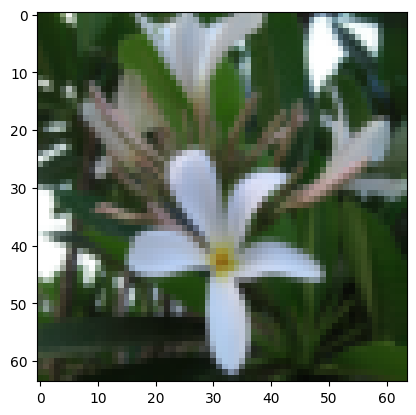

In [36]:
plt.imshow(train_x[9])

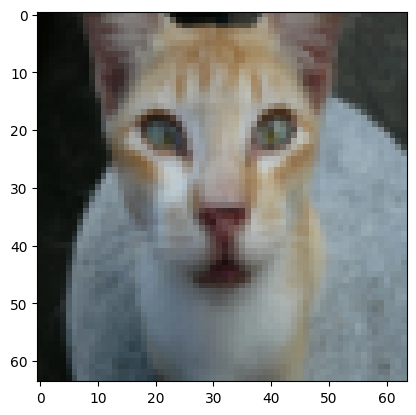

In [37]:
plt.imshow(train_x[11])

In [59]:
num_px=train_x.shape[1]

In [39]:
trainf_X = train_x.reshape(train_x.shape[0],-1).T
testf_X = test_x.reshape(test_x.shape[0], -1).T

In [40]:
trainf_X = trainf_X/255
testf_X  = testf_X/255
pd.DataFrame(trainf_X)

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
0,0.066667,0.768627,0.321569,0.003922,0.035294,0.329412,0.219608,0.074510,0.247059,0.090196,...,0.113725,1.000000,0.168627,0.400000,0.364706,0.784314,0.035294,0.560784,0.086275,0.031373
1,0.121569,0.752941,0.278431,0.086275,0.035294,0.309804,0.223529,0.086275,0.266667,0.184314,...,0.196078,1.000000,0.223529,0.619608,0.435294,0.784314,0.043137,0.607843,0.094118,0.109804
2,0.219608,0.745098,0.266667,0.007843,0.019608,0.196078,0.090196,0.007843,0.239216,0.043137,...,0.113725,1.000000,0.105882,0.415686,0.560784,0.800000,0.050980,0.647059,0.090196,0.207843
3,0.086275,0.756863,0.349020,0.003922,0.039216,0.329412,0.203922,0.090196,0.250980,0.098039,...,0.278431,1.000000,0.270588,0.345098,0.388235,0.780392,0.031373,0.721569,0.090196,0.054902
4,0.129412,0.729412,0.325490,0.054902,0.035294,0.309804,0.215686,0.101961,0.266667,0.196078,...,0.352941,1.000000,0.329412,0.588235,0.462745,0.780392,0.047059,0.745098,0.098039,0.129412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12283,0.000000,0.321569,0.580392,0.239216,0.062745,0.149020,0.145098,0.039216,0.035294,0.247059,...,0.094118,0.203922,0.494118,0.788235,0.000000,0.862745,0.015686,0.423529,0.019608,0.000000
12284,0.000000,0.321569,0.596078,0.101961,0.039216,0.086275,0.035294,0.015686,0.023529,0.050980,...,0.043137,0.101961,0.509804,0.627451,0.000000,0.921569,0.000000,0.592157,0.000000,0.000000
12285,0.000000,0.321569,0.541176,0.007843,0.066667,0.219608,0.086275,0.027451,0.027451,0.141176,...,0.054902,0.274510,0.278431,0.423529,0.000000,0.729412,0.019608,0.333333,0.015686,0.000000
12286,0.000000,0.313725,0.552941,0.231373,0.121569,0.137255,0.145098,0.031373,0.035294,0.250980,...,0.113725,0.180392,0.392157,0.803922,0.000000,0.901961,0.015686,0.419608,0.019608,0.000000


In [41]:
def sigmoid(z):
    s = 1/(1+ np.exp(-z))
    return s

In [42]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0.
    return w, b

In [43]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot (w.T , X)+b)
    cost =  np.sum ( Y* np.log(A)+(1-Y)* np.log(1-A))/-m
    dw = np.dot(X, (A-Y).T)/m
    db = np.sum(A-Y)/m
    cost = np.squeeze(np.array(cost))
    grades = {"dw":dw,
              "db":db,}
    return cost, grades

In [44]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    for i in range (num_iterations):
        cost,grades= propagate(w,b, X, Y)
        dw= grades["dw"]
        db= grades["db"]
        w= w-(learning_rate)*dw
        b = b - (learning_rate)*db
        if i % 100 == 0:
            costs.append(cost)
    params = {"w":w, "b":b
    }
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [45]:
def predict(w,b,X):
    m = X.shape[1]
    Y_predict= np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    A= sigmoid(np.dot(w.T, X)+b)
    for i in range(A.shape[1]):
        if (A[0,i]>0.5):
            Y_predict[0,i]=1
        else :
            Y_predict[ 0 , i ] = 0
    return Y_predict

In [52]:
def model_LR(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost):
    w,b = initialize_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train , Y_train, num_iterations, learning_rate, print_cost=False)
    w = params['w']
    b = params['b']
    Y_prediction_test= predict(w, b, X_test)
    Y_prediction_train= predict(w, b, X_train)
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [54]:
logistic_regression_model = model_LR(trainf_X, train_y, testf_X, test_y, num_iterations=2000, learning_rate=0.01, print_cost=True)

train accuracy: 99.52153110047847 %
test accuracy: 70.0 %


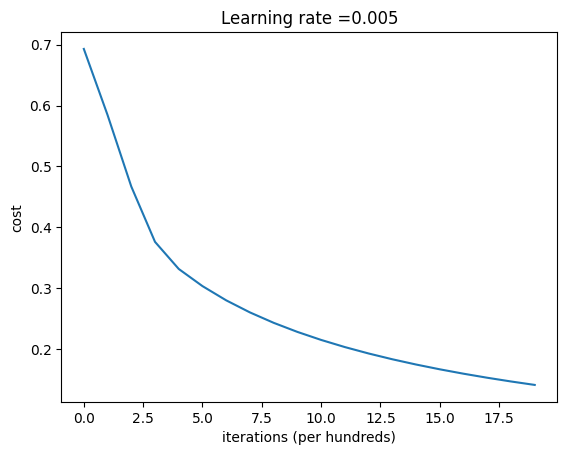

In [51]:
costs = np.squeeze(logistic_regression_model["costs"])
plt.plot(costs)
plt.xlabel('iterations (per hundreds)')
plt.ylabel('cost')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

(1, 1)
y = 1.0, your algorithm predicts a "cat" picture.


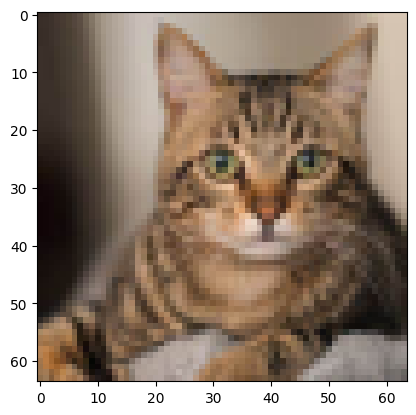

In [71]:
image = np.array(Image.open("OIP.jpg").resize((num_px, num_px)))
plt.imshow(image)
image = image.reshape((1,  num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)
print(my_predicted_image.shape)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

y = 0.0, your algorithm predicts a "non-cat" picture.


C:\Users\Bishwanath Jana\AppData\Local\Temp\ipykernel_23220\577252987.py:2: RuntimeWarning: overflow encountered in exp
  s = 1/(1+ np.exp(-z))


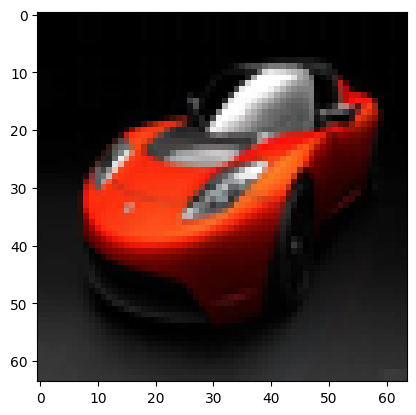

In [73]:
image = np.array(Image.open("car.jpg").resize((num_px, num_px)))
plt.imshow(image)
image = image.reshape((1,  num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

y = 0.0, your algorithm predicts a "non-cat" picture.


C:\Users\Bishwanath Jana\AppData\Local\Temp\ipykernel_23220\577252987.py:2: RuntimeWarning: overflow encountered in exp
  s = 1/(1+ np.exp(-z))


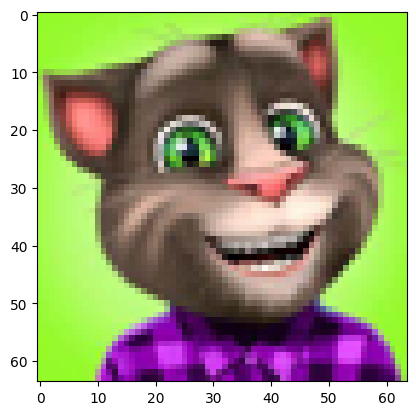

In [74]:
image = np.array(Image.open("billu.jpg").resize((num_px, num_px)))
plt.imshow(image)
image = image.reshape((1,  num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")